- Popülasyon ve Örneklem
- Merkezi Limit Teoremi
- Büyük Sayılar Yasası

# 1. Popülasyon ve Örneklem

Python ile örneklem almak için Numpy kütüphanesinde ki random modülünde yer alan choice fonksiyonunu kullanabiliriz. Bunun için öncelikle bir popülasyuna ihtiyacımız olacak. Bu herhangi bir veri olabilir. Biz şimdilik popülasyonu da kendimiz oluşturalım. Bunun için ise aynı modülün içinden normal fonksiyonunu kullanarak ortalaması 10 ve standart sapması 0.2 olan 10000 sayıdan oluşan bir popülasyon oluşturalım ve içinden 500 elemanlık bir örneklem seçelim.

In [1]:
import numpy as np
populasyon = np.random.normal(10, 0.2, 10000)
orneklem = np.random.choice(populasyon, 500)
# Artık elimizde normal dağılımlı 10000 elemanlı bir popülasyon ve bu popülasyondan alınmış 500 elemanlı bir örneklem var.

In [2]:
print('Popülasyon için oran : ', len(populasyon[populasyon > 10.2])/len(populasyon)*100)
print('Örneklem için oran   : ', len(orneklem[orneklem > 10.2])/len(orneklem)*100)
# popülasyon ve örneklemde yer alan 10.2 den büyük sayıların oranına bakalım.

Popülasyon için oran :  15.75
Örneklem için oran   :  20.200000000000003


Oranlar eşit olmasa da birbirine yakın. Ancak örneklemimiz belirli bir hata payıyla popülasyon hakkkında bilgi verdi.

# 2. Merkezi Limit Teoremi (Central Limit Theorem)

Merkezi Limit Teoremi, normal dağılımın önemini gösteren bir teoremdir. Buna göre, örneklem sayısı arttıkça, örneklem dağılımınin ortalaması aynı popülasyon ortalamasına yaklaşmaktadır. Merkezi Limit Teoremi, belirli bir popülasyondan tekrar tekrar alınan örneklem ortalamasının dağılımının şeklinin tam olarak ne olacağı ile ilgilidir. Spesifik olarak, örneklem büyüklükleri arttıkça, tekrarlanan örneklemin ortalamasının dağılımı normal dağılıma yaklaşacaktır.

Merkezi Limit Teoreminin geçerli olması için bazı şartların yerine getirilmesi gerekmektedir. Bunlar, örneklemlerin birbirinden bağımsız olması ve eş bir dağılıma sahip olmasıdır (Independent and identically distributed). Merkezi limit teoremi popülasyonun dağılımına ilişkin herhangi bir ek varsayımda bulunmamaktadır. Zar örneği üzerinden düşünecek olursak bir zar atışının önceki atıştan bağımsız ve her atışta çıkabilecek sayıların çıkma olasılığı aynı olması şartları sağlamaktadır.

### 2.3. Örneklemdeki Grupların Karşılaştırılması

- Birinci binom dağılım değişkeni : p = 0.2, n = 10 ve 10000 veri noktası (grup1)
- İkinci binom dağılım değişkeni : p = 0.5, n = 10 ve 10000 veri noktası (grup2)

İki popülasyon arasındaki gerçek standart sapma farkı 0.3'tür.

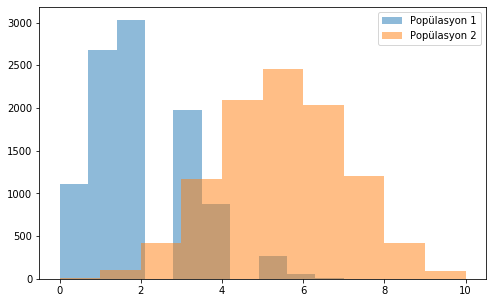

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,5))

pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

plt.hist(pop1, alpha=0.5, label='Popülasyon 1') 
plt.hist(pop2, alpha=0.5, label='Popülasyon 2') 
plt.legend(loc='upper right') 
plt.show()

Popülasyonlar normal dağılımlı değil. Şimdi, her popülasyondan 100'er elemanlı örneklemler alalım ve bu örneklemlerin histogramını çizelim.

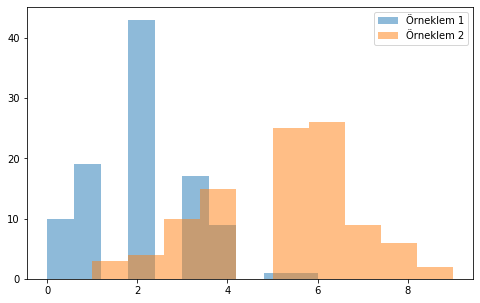

In [4]:
plt.figure(figsize=(8,5))

orneklem1 = np.random.choice(pop1, 100, replace=True)
orneklem2 = np.random.choice(pop2, 100, replace=True)

plt.hist(orneklem1, alpha=0.5, label='Örneklem 1') 
plt.hist(orneklem2, alpha=0.5, label='Örneklem 2') 
plt.legend(loc='upper right') 
plt.show()

In [5]:

print("1. Örneklemin ortalaması : ", orneklem1.mean())
print("2. Örneklemin ortalaması : ", orneklem2.mean())
print("1. Örneklemin standart sapması : ", orneklem1.std())
print("2. Örneklemin standart sapması : ", orneklem2.std())

1. Örneklemin ortalaması :  2.03
2. Örneklemin ortalaması :  5.11
1. Örneklemin standart sapması :  1.1700854669638454
2. Örneklemin standart sapması :  1.6905324604987622


Şimdi standart sapmaların ortalamaların farkına bakalım.

In [6]:
fark = orneklem2.mean() - orneklem1.mean()
print(fark)

3.0800000000000005


Şimdi de, örneklem dağılımının standart hatasını hesaplayalım. İlk olarak, her bir değişkenin boyutunu ve standart sapmasını içeren birer dizi oluşturalım. Örneklemlerin boyutlarını biliyoruz, ancak onları yine de hesaplayalım.

In [7]:
boyut = np.array([len(orneklem1), len(orneklem2)])
sd = np.array([orneklem1.std(), orneklem2.std()])
fark_se = (sum(sd ** 2 / boyut)) ** 0.5 

Ortalamalar arasındaki farkı standart hataya bölerek t-istatistiğini hesaplayalım.

In [8]:
print(fark/fark_se)

14.980785738056209


Şimdi bu değeri farklı bir yöntemle daha hesaplayalım. Bu kez, “istatistik” olarak da adlandırılan t-değerini ve “p-değeri” olarak adlandırılırılan olasılığı scipy kütüphanesindeki stats modülünde yer alan ttest_ind fonksiyonunu kullanarak hesaplayacağız. Bizim hesapladığımız t-değeri ile fonksiyonun hesapladığı t-değeri birbirinden biraz farklı (1/100 hassasiyetle) olabilir. İki hesaplama arasındaki bu küçük farklılık çoklu adım yaklaşımımızın (multiple step approach) neden olduğu yuvarlama farklılıklarından kaynaklandığını söyleyebiliriz.

In [9]:
from scipy.stats import ttest_ind
ttest_degeri = ttest_ind(orneklem1, orneklem2, equal_var=False)
print(ttest_degeri)

Ttest_indResult(statistic=-14.90569360735195, pvalue=4.932633459658053e-33)


t değeri, iki grup arasındaki farkı, iki örneklemdeki varyans miktarı ile ölçeklendirir. Örneklemlerdeki yüksek değişkenlik, ortalamaları çok farklı görünen gruplara öncülük edebilir. Ancak histograma baktığımızda, örneklem gruplarındaki değerlerin çoğunun örtüştüğünü görürüz. Gruplar, değerlerin dağılımının geniş olduğu kadar değişkenlerdir. Örneğin, Olimpiyat yarışları erkekler ve kadınlar olarak ayrılır çünkü erkekler ortalama olarak kadınlardan daha hızlıdır. Bununla birlikte, kadınların New York maratonunda koşu hızının dağılımına bakarak, (ki burada kadınlar ve erkekler birlikte koşarlar), koşu hızının yüksek derecede değişkenliğe sahip olduğu açıktır ve erkekler ile kadınlar için dağılımlar çok fazla örtüşmektedir.

Bir t-değerini yorumlamanın bir yolu, grup ortalamalarıyla ayrılan alan kadar standart hataların sayısıdır. 2'lik bir t değeri, ortalamaların birbirinden iki standart hata uzaklığında olduğunu gösterir. Bir t testi ile ilişkili p değeri, örneklemlerde bu büyüklükte veya popülasyonlar farklı değilse daha büyük bir fark elde etme olasılığını gösterir. Daha küçük p değeri, kuvvetle muhtemel örneklemlerde gördüğümüz farklılığın popülasyonları anlamlı bir şekilde yansıtmasıdır. Yukarıda yaptığınız testteki p değeri gerçekten çok küçüktür, bu yüzden, ortalamalar arasında gördüğümüz farkın, örneklemdeki değişkenlikten dolayı değil, popülasyondaki gerçek bir farklılık olduğundan emin olabiliriz.

# 3. Büyük Sayılar Yasası (Law of Large Numbers)

Büyük sayılar yasasına göre, örneklem sayısı büyüdükçe, örneklem ortalaması popülasyonun ortalamasına yaklaşmaktadır. Bu yaklaşım, bize örneklem sayısının önemini anlatmaktadır. Basitçe, örneklem sayısı ne kadar fazla olursa, ilgili örneklem popülasyonu o kadar iyi temsil etmektedir.

Büyük Sayılar Yasası çok basittir: eş bir dağılıma sahip ve rassal olarak seçilen değişkenlerden oluşan örneklemin sayısı arttıkça, örneklem ortalaması teorik ortalamaya yaklaşır.

In [10]:
örneklem = []
örneklem_ortalamaları = []
for atış_sayısı in range(1,2000):
    atış = np.random.randint(low=1,high=7, size=1)[0]
    örneklem.append(atış)
    örneklem_ortalamaları.append(np.mean(örneklem))
# Örneğimizde 2000 defa zar atacağız.
# Zar attıkça çıkan zarı örneklemimize eklerken, bir taraftan da örneklemin ortalamasını ayrı bir listeye atacağız.

In [11]:
print(örneklem[0:10])
print(örneklem_ortalamaları[0:10])

[1, 2, 2, 4, 1, 6, 1, 4, 6, 5]
[1.0, 1.5, 1.6666666666666667, 2.25, 2.0, 2.6666666666666665, 2.4285714285714284, 2.625, 3.0, 3.2]


In [12]:
def orneklem_plotla(örneklem_ortalaması,orneklem_sayisi, subplot_no):
    baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
    eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
    plt.subplot(subplot_no)
    plt.hlines(3.5, 0, orneklem_sayisi, colors= 'r' )
    plt.plot(örneklem_ortalaması[0:orneklem_sayisi])
    plt.ylim((1,6))
    plt.title("Örneklem Sayısı = {}".format(orneklem_sayisi), fontdict = baslik_font)
    plt.xlabel("Örneklem Sayısı", fontdict = eksen_font)
    plt.ylabel("Örneklem Ortalaması", fontdict = eksen_font)
    return plt

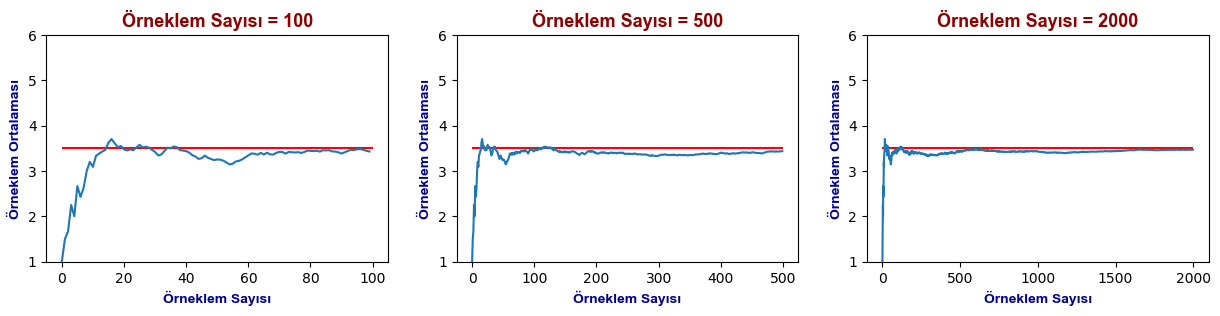

In [13]:
plt.figure(figsize=(15,3), dpi=100)
orneklem_plotla(örneklem_ortalamaları,100, 131) 
# 131 --> 1 satır ve 3 sütunluk subplot, 1.subplot
orneklem_plotla(örneklem_ortalamaları, 500, 132)
orneklem_plotla(örneklem_ortalamaları, 2000, 133)
plt.show()